In [1]:

import numpy as np
import pandas as pd
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Labels

In [3]:
labels = os.listdir(r"drive/MyDrive/train")

In [4]:
labels

['.DS_Store', 'Closed', 'no_yawn', 'Open', 'yawn']

## Visualize A random image

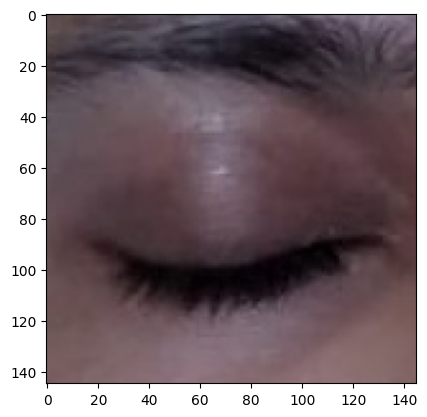

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"drive/MyDrive/train/Closed/_0.jpg"))

## Image array

In [6]:
a = plt.imread(r"drive/MyDrive/train/yawn/10.jpg")

## Image shape

In [7]:
a.shape

(480, 640, 3)

## Visualize yawn image(Background is unnecessary. We need only face image array)


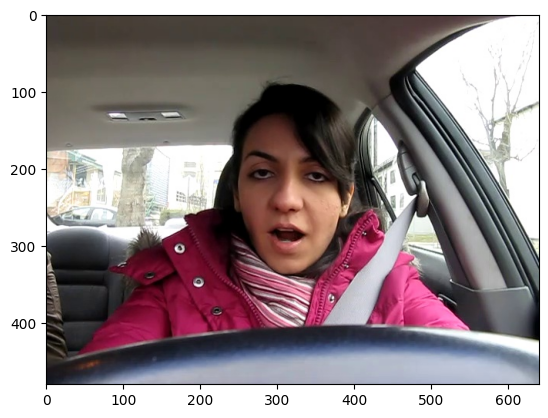

In [8]:
plt.imshow(plt.imread(r"drive/MyDrive/train/yawn/10.jpg"))

## Take only face(For yawn and not_yawn)

In [9]:
face_cas_path = r"drive/MyDrive/data/haarcascade_frontalface_default.xml"
if not os.path.exists(face_cas_path):
    print(f"File not found at: {face_cas_path}")

In [10]:
import os
import cv2

def face_for_yawn(direc=r"drive/MyDrive/train", face_cas_path=r"drive/MyDrive/data/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]

    # Load the cascade classifier
    face_cascade = cv2.CascadeClassifier(face_cas_path)

    # Check if the cascade file was loaded correctly
    if face_cascade.empty():
        print("Error loading face cascade file.")
        return None

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(f"Processing category: {category}, Class number: {class_num1}")

        for image in os.listdir(path_link):
            image_path = os.path.join(path_link, image)
            image_array = cv2.imread(image_path, cv2.IMREAD_COLOR)

            # Check if the image was loaded successfully
            if image_array is None:
                print(f"Error loading image: {image_path}")
                continue

            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])

    return yaw_no

# Example usage
yawn_no_yawn = face_for_yawn()


Processing category: yawn, Class number: 0
Processing category: no_yawn, Class number: 1


## For Closed and Open eye

In [11]:
import os
import cv2

def get_data(dir_path=r"drive/MyDrive/train", face_cas=r"drive/MyDrive/data/haarcascade_frontalface_default.xml", eye_cas=r"drive/MyDrive/data/haarcascade_eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data


In [12]:
data_train = get_data()

2
3


## Extend data and Convert array

In [13]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    images = []
    labels = []

    for image_data, label in yaw_no:
        images.append(image_data)
        labels.append(label)

    # Convert to NumPy arrays
    images = np.array(images)  # This will be a 4D array: (num_samples, IMG_SIZE, IMG_SIZE, channels)
    labels = np.array(labels)  # This will be a 1D array: (num_samples,)

    return images, labels


## New variable to store

In [14]:
images, labels = append_data()

Processing category: yawn, Class number: 0
Processing category: no_yawn, Class number: 1
2
3


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  2, 247,   3],
        [ 11, 217,  17],
        ...,
        [  6, 210,   9],
        [  6, 210,   9],
        [  0, 252,   1]],

       [[  0, 255,   0],
        [ 11, 217,  16],
        [ 53,  72,  80],
        ...,
        [ 30,  39,  44],
        [ 31,  40,  44],
        [  2, 240,   3]],

       ...,

       [[  0, 255,   0],
        [ 47, 252,  51],
        [228, 243, 246],
        ...,
        [138, 148, 150],
        [146, 155, 158],
        [ 10, 248,  11]],

       [[  0, 255,   0],
        [ 46, 251,  49],
        [220, 233, 238],
        ...,
        [133, 143, 146],
        [142, 151, 154],
        [ 10, 248,  10]],

       [[  0, 255,   0],
        [  3, 254,   3],
        [ 15, 253,  16],
        ...,
        [  9, 247,  10],
        [ 10, 248,  11],
        [  1, 254,   1]]], dtype=uint8)
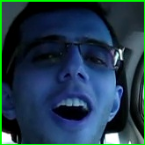

In [28]:
images[0]

## Separate label and features

In [16]:
x = []
y = []
for image in images:
    x.append(image)
for label in labels:
    y.append(label)

In [18]:
x[0].shape

(145, 145, 3)

In [26]:
y[0]

array([1, 0, 0, 0])

## Reshape the Array

In [19]:
x = np.array(x)
x = x.reshape(-1, 145, 145, 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  2, 247,   3],
        [ 11, 217,  17],
        ...,
        [  6, 210,   9],
        [  6, 210,   9],
        [  0, 252,   1]],

       [[  0, 255,   0],
        [ 11, 217,  16],
        [ 53,  72,  80],
        ...,
        [ 30,  39,  44],
        [ 31,  40,  44],
        [  2, 240,   3]],

       ...,

       [[  0, 255,   0],
        [ 47, 252,  51],
        [228, 243, 246],
        ...,
        [138, 148, 150],
        [146, 155, 158],
        [ 10, 248,  11]],

       [[  0, 255,   0],
        [ 46, 251,  49],
        [220, 233, 238],
        ...,
        [133, 143, 146],
        [142, 151, 154],
        [ 10, 248,  10]],

       [[  0, 255,   0],
        [  3, 254,   3],
        [ 15, 253,  16],
        ...,
        [  9, 247,  10],
        [ 10, 248,  11],
        [  1, 254,   1]]], dtype=uint8)
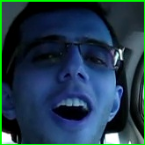

In [27]:
x[0]

## LabelBinarizer

In [20]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

## Label array

In [21]:
y = np.array(y)

## Train Test split

In [22]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)

## Length of X_test

In [23]:
len(x_test)

536

## Import some dependencies

In [25]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## Data Augmentation

In [47]:
len(x_train)

1249

In [51]:
print(x_train.shape, y_train.shape)  # Check that x_train is 4D (e.g., (num_samples, 145, 145, 3))
print(x_test.shape, y_test.shape)    # Similarly, x_test should also be 4D


(1249, 145, 145, 3) (1249, 4)
(536, 145, 145, 3) (536, 4)


In [54]:
train_data_gen = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_data_gen = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_data_gen.flow(np.array(x_train), y_train,batch_size=32, shuffle=False)
test_generator = test_data_gen.flow(np.array(x_test), y_test,batch_size=32, shuffle=False)

# Model

In [72]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping Callback and TensorBoard Setup

In [73]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                mode='max',
                                                patience=10,
                                                verbose=1)


In [74]:
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard

def create_tensorboard_callback():
    log_dir = "drive/MyDrive/logs/fit/"
    return TensorBoard(log_dir=log_dir, histogram_freq=1)

# Correct usage:
tensorboard_callback = create_tensorboard_callback()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [75]:
NUM_EPOCHS=50
batch_size=16
steps_per_epoch = len(x_train)//batch_size
validation_steps = len(x_test)

history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    shuffle=True,
    callbacks=[tensorboard_callback,early_stopping]
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.4001 - loss: 1.2621 - val_accuracy: 0.4347 - val_loss: 1.1400
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.6350 - loss: 0.8788 - val_accuracy: 0.7948 - val_loss: 0.5156
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8023 - loss: 0.4683 - val_accuracy: 0.8694 - val_loss: 0.3264
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.8303 - loss: 0.4013 - val_accuracy: 0.8731 - val_loss: 0.3334
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8485 - loss: 0.3658 - val_accuracy: 0.8881 - val_loss: 0.2383
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.8871 - loss: 0.3046 - val_accuracy: 0.9422 - val_loss: 0.1628
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9010 - loss: 0.2718 - val_accuracy: 0.9216 - val_loss: 0.1905
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.8641 - loss: 0.3513 - val_accuracy: 0.87

## History

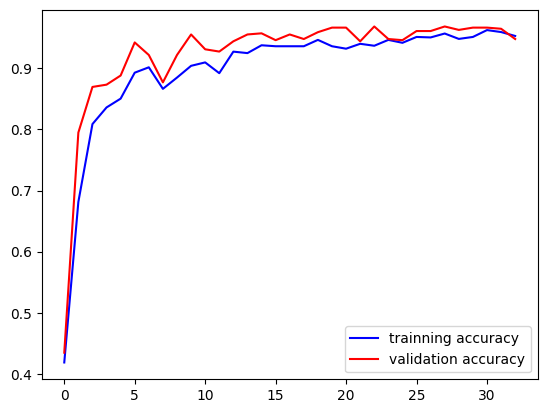

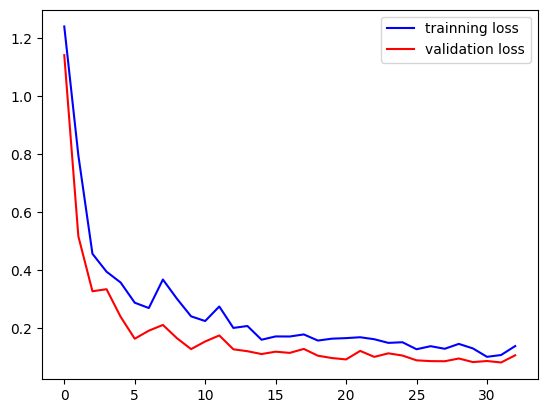

In [76]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Save Model

In [87]:
model.save("drive/MyDrive/models/drowiness_cnn_model.h5")

# Prediction

In [80]:
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [81]:
predicted_classes

array([3, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3,
       2, 3, 1, 3, 0, 1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3,
       3, 2, 1, 2, 3, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 3, 2, 3, 0, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 3, 2, 2, 0, 3, 2,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 0,
       3, 2, 3, 2, 2, 3, 0, 0, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3,
       0, 3, 0, 3, 2, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2,
       3, 1, 2, 2, 3, 2, 3, 2, 3, 3, 0, 3, 2, 2, 3, 2, 2, 0, 1, 2, 3, 2,
       0, 3, 3, 2, 3, 2, 3, 0, 2, 2, 3, 3, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 0, 3, 3, 2, 1, 2, 2, 0, 2, 3, 3, 0, 1, 3, 2, 3, 1, 3, 3, 2,
       0, 3, 2, 1, 2, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 2,
       2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 0, 3, 2, 1, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3,

# Classification report

In [82]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [84]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.82      0.91      0.86        45
     no_yawn       0.93      0.81      0.86        47
      Closed       0.97      0.96      0.96       224
        Open       0.95      0.97      0.96       220

    accuracy                           0.94       536
   macro avg       0.92      0.91      0.91       536
weighted avg       0.95      0.94      0.94       536



# predicting function

In [89]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="drive/MyDrive/data/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("drive/MyDrive/models/drowiness_cnn_model.h5")

# Prediction
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


0

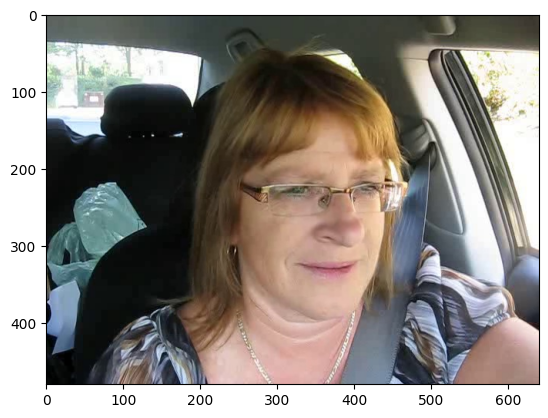

In [91]:
prediction = model.predict([prepare(r"drive/MyDrive/train/no_yawn/1067.jpg")])
plt.imshow(plt.imread(r"drive/MyDrive/train/no_yawn/1067.jpg"))
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2

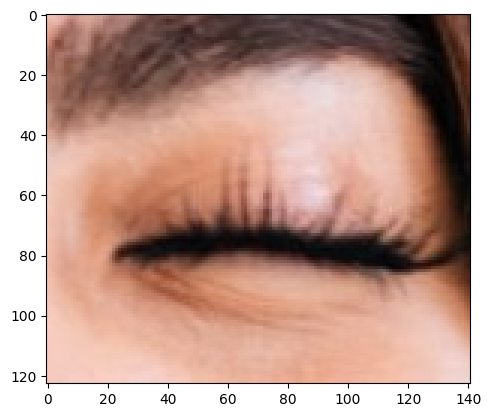

In [92]:
plt.imshow(plt.imread(r"drive/MyDrive/train/Closed/_101.jpg"))
prediction = model.predict([prepare(r"drive/MyDrive/train/Closed/_101.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2

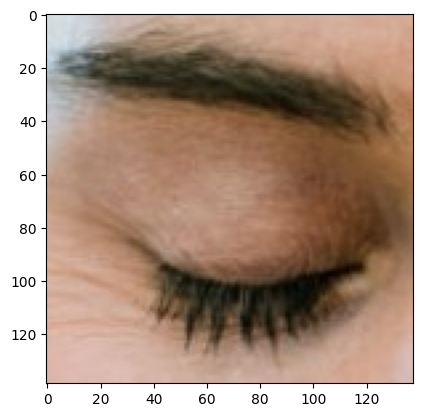

In [93]:
plt.imshow(plt.imread(r"drive/MyDrive/train/Closed/_104.jpg"))
prediction = model.predict([prepare(r"drive/MyDrive/train/Closed/_104.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2

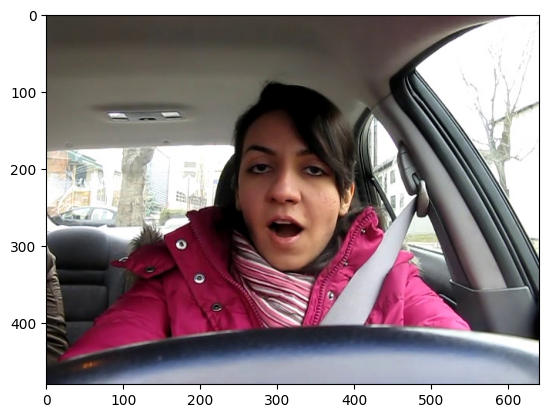

In [94]:
plt.imshow(plt.imread(r"drive/MyDrive/train/yawn/12.jpg"))
prediction = model.predict([prepare(r"drive/MyDrive/train/yawn/12.jpg")])
np.argmax(prediction)
